-- TASK 2: EXPERIMENTATION AND UPLIFT TESTING 

In [426]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime, timedelta
from scipy.stats import pearsonr

In [428]:
experimentation = pd.read_excel(r"D:\DATA ANALYST\Quantium Project\Final_Data.xlsx")

In [429]:
experimentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              264836 non-null  datetime64[ns]
 1   Store_Number      264836 non-null  int64         
 2   Loyal_ID          264836 non-null  int64         
 3   Transaction_ID    264836 non-null  int64         
 4   Product_ID        264836 non-null  int64         
 5   Product_Name      264836 non-null  object        
 6   Product_Quantity  264836 non-null  int64         
 7   Total_Sales       264836 non-null  float64       
 8   Life_Stage        264836 non-null  object        
 9   Premium_Customer  264836 non-null  object        
 10  Brand_Name        264836 non-null  object        
 11  Product           263272 non-null  object        
 12  Packet_Size       264836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memor

In [430]:
experimentation['Store_Number'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [431]:
# Using .isin() to filter rows
store_trail = experimentation.loc[experimentation['Store_Number'].isin([77,86,88])].sort_values(by='Store_Number')
store_trail

,Date,Store_Number,Loyal_ID,Transaction_ID,Product_ID,Product_Name,Product_Quantity,Total_Sales,Life_Stage,Premium_Customer,Brand_Name,Product,Packet_Size
263934,2018-11-07,77,77021,74934,96,WW Original Stacked Chipss 160g,2,3.8,YOUNG SINGLES/COUPLES,Premium,WW,Original Stacked Chipss,160g
175834,2019-05-22,77,77173,75101,62,Pringles Mystery Flavour 134g,1,3.7,RETIREES,Premium,Pringles,Mystery Flavour,134g
175833,2019-01-10,77,77173,75100,110,WW Original Corn Chipss 200g,2,3.8,RETIREES,Premium,WW,Original Corn Chipss,200g
175832,2018-10-21,77,77154,75081,79,Smiths Chips Thinly Cut Salt Vinegar175g,1,3.0,RETIREES,Premium,Smiths,Chips Thinly Cut Salt Vinegar,175g
175831,2019-02-03,77,77131,75056,56,Cheezels Cheese Box 125g,1,2.1,RETIREES,Premium,Cheezels,Cheese Box,125g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59973,2018-07-16,88,88100,86720,75,Cobs Popd Sea Salt Chipss 110g,2,7.6,OLDER FAMILIES,Mainstream,Cobs,Popd Sea Salt Chipss,110g
59972,2019-04-25,88,88077,86591,20,Doritos Cheese Supreme 330g,2,11.4,OLDER FAMILIES,Mainstream,Doritos,Cheese Supreme,330g
59971,2019-02-07,88,88077,86590,15,Twisties Cheese 270g,2,9.2,OLDER FAMILIES,Mainstream,Twisties,Cheese,270g
59977,2018-08-06,88,88112,86787,51,Doritos Mexicana 170g,2,8.8,OLDER FAMILIES,Mainstream,Doritos,Mexicana,170g


In [432]:
def revenue_quantity(data_frame,*columns):
    revenue_quantity = data_frame.groupby(list(columns)).agg(
        revenue=('Total_Sales', 'sum'),
        quantity=('Product_Quantity', 'sum')
    ).sort_values(by='revenue', ascending=False).reset_index()
    return revenue_quantity


In [433]:
# Revenue and quantity of trail store 
revenue_quantity(store_trail,'Store_Number')
# 3 store trên đại diện cho 3 mức doanh thu, từ cao, trung bình đến thấp trên toàn bộ chuỗi của hàng 

,Store_Number,revenue,quantity
0,88,16333.25,3718
1,86,10635.35,3066
2,77,3040.00,872


In [434]:
all_store = revenue_quantity(experimentation,'Store_Number')

In [435]:
# Chia toàn bộ của hàng thành 3 nhóm của hàng với các mức doanh thu:
# Tính toán các ngưỡng Bins
min_value = all_store['revenue'].min()
max_value = all_store['revenue'].max()
q1 = all_store['revenue'].quantile(1/3)  # 33.3%
q2 = all_store['revenue'].quantile(2/3)  # 66.7%

bins= [min_value,q1,q2,max_value]
#  Chia các của hàng vào các nhóm 
labels = ['Low', 'Medium', 'High']
all_store['Revenue_Group'] = pd.cut(all_store['revenue'], bins=bins, labels=labels, right=True)
all_store

,Store_Number,revenue,quantity,Revenue_Group
0,226,18905.45,4401,High
1,88,16333.25,3718,High
2,165,15973.75,3602,High
3,40,15559.50,3499,High
4,237,15539.50,3515,High
...,...,...,...,...
267,206,7.60,2,Low
268,252,7.40,2,Low
269,11,6.70,2,Low
270,76,6.00,2,Low


In [436]:
# Revenue and quantity of per group
Mean_revenue_group = all_store.groupby('Revenue_Group')[['revenue','quantity']].mean().reset_index()
Mean_revenue_group

C:\Users\PC\AppData\Local\Temp\ipykernel_28628\13477555.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Mean_revenue_group = all_store.groupby('Revenue_Group')[['revenue','quantity']].mean().reset_index()


,Revenue_Group,revenue,quantity
0,Low,1796.871111,504.388889
1,Medium,7243.193333,1921.288889
2,High,12316.527473,3151.769231


In [437]:
def find_closest_store(target_revenue):
    all_store['Difference'] = (all_store['revenue'] - target_revenue).abs()
    closest_store = all_store.loc[all_store['Difference'].idxmin()].reset_index()
    return closest_store

In [438]:
control_store_num_77 = find_closest_store(1796.871111)
control_store_num_77

,index,230
0,Store_Number,120
1,revenue,1810.15
2,quantity,520
3,Revenue_Group,Low
4,Difference,13.278889


In [439]:
control_store_num_86 = find_closest_store(7243.193333)
control_store_num_86

,index,134
0,Store_Number,56
1,revenue,8393.05
2,quantity,2422
3,Revenue_Group,Medium
4,Difference,1149.856667


In [440]:
control_store_num_88 = find_closest_store(12316.527473)
control_store_num_88

,index,38
0,Store_Number,230
1,revenue,12287.0
2,quantity,3476
3,Revenue_Group,High
4,Difference,29.527473


In [441]:
# List of control store include: 230,56,120
# Total revenue and quatity of control store 
control_store = experimentation.loc[experimentation['Store_Number'].isin([120,56,230])].sort_values(by='Store_Number')
revenue_quantity(control_store,'Store_Number')

,Store_Number,revenue,quantity
0,230,12287.00,3476
1,56,8393.05,2422
2,120,1810.15,520


In [442]:
# Total revenue and quantity of trail stores 
revenue_quantity(store_trail,'Store_Number')

,Store_Number,revenue,quantity
0,88,16333.25,3718
1,86,10635.35,3066
2,77,3040.00,872


=> Total revenue and quantity of per trail store higher than per control store 

In [444]:
def no_customer(data_frame):
    no_customer = data_frame.groupby('Store_Number').agg(
        Amount_customers = ('Loyal_ID','nunique')).reset_index()
    return no_customer

In [445]:
# Total number customers of trail store 
no_customer(store_trail)

,Store_Number,Amount_customers
0,77,356
1,86,273
2,88,388


In [446]:
# Total number customers of control store
no_customer(control_store)

,Store_Number,Amount_customers
0,56,238
1,120,306
2,230,248


=> Number of customer of per trail store higher than control store

In [448]:
def avg_transaction_per_cus(data_frame):
    customer_transactions = data_frame.groupby(['Store_Number','Loyal_ID'])['Transaction_ID'].nunique().reset_index(name= 'Transactions_Count')
    avg_transactions = customer_transactions.groupby('Store_Number')['Transactions_Count'].mean().reset_index(name='Avg_Transactions_Per_Customer')
    return avg_transactions

In [449]:
# Average number of transaction per customer on Trail store
avg_transaction_per_cus(store_trail)

,Store_Number,Avg_Transactions_Per_Customer
0,77,1.578652
1,86,5.589744
2,88,4.786082


In [450]:
# Average number of transaction per customer on Control store
avg_transaction_per_cus(control_store)

,Store_Number,Avg_Transactions_Per_Customer
0,56,5.084034
1,120,1.552288
2,230,7.004032


=> Average number of transaction per customer on Control store lower than trail store

==> Overall, the layout changes helped the test stores increase revenue, sales volume, customer volume, and average purchases per customer across all three segments of small, medium, and large stores.

In [453]:
def month_revenue_qty(data_frame):
    data_frame['Year'] = data_frame['Date'].dt.year
    data_frame['Month'] = data_frame['Date'].dt.month
    month_revenue_qty = data_frame.groupby(['Store_Number','Year','Month'])[['Total_Sales','Product_Quantity']].sum().reset_index()
    return month_revenue_qty

In [454]:
# Monthly revenue and quantity of trail stores
monthly_revenue_trail = month_revenue_qty(store_trail)
monthly_revenue_trail

,Store_Number,Year,Month,Total_Sales,Product_Quantity
0,77,2018,7,296.80,84
1,77,2018,8,255.50,74
2,77,2018,9,225.20,70
3,77,2018,10,204.50,52
4,77,2018,11,245.30,67
5,77,2018,12,267.30,72
6,77,2019,1,204.40,65
7,77,2019,2,235.00,74
8,77,2019,3,278.50,82
9,77,2019,4,263.50,78


In [455]:
# Monthly revenue and quantity of control stores
monthly_revenue_control = month_revenue_qty(control_store)
monthly_revenue_control

,Store_Number,Year,Month,Total_Sales,Product_Quantity
0,56,2018,7,674.60,188
1,56,2018,8,634.50,196
2,56,2018,9,691.00,198
3,56,2018,10,872.00,246
4,56,2018,11,714.00,212
5,56,2018,12,802.80,230
6,56,2019,1,647.00,190
7,56,2019,2,626.60,176
8,56,2019,3,699.40,200
9,56,2019,4,762.60,220


In [456]:
def monthly_no_customer(data_frame):
    monthly_no_customer = data_frame.groupby(['Store_Number','Year','Month']).agg(
        Amount_customers = ('Loyal_ID','nunique')).reset_index()
    return monthly_no_customer

In [457]:
# Monthly customers on trail stores
monthly_no_cus_trail = monthly_no_customer(store_trail)
monthly_no_cus_trail

,Store_Number,Year,Month,Amount_customers
0,77,2018,7,51
1,77,2018,8,47
2,77,2018,9,42
3,77,2018,10,37
4,77,2018,11,41
5,77,2018,12,46
6,77,2019,1,35
7,77,2019,2,45
8,77,2019,3,50
9,77,2019,4,47


In [458]:
# Monthly customers on control stores
monthly_no_cus_control = monthly_no_customer(control_store)
monthly_no_cus_control

,Store_Number,Year,Month,Amount_customers
0,56,2018,7,84
1,56,2018,8,81
2,56,2018,9,77
3,56,2018,10,99
4,56,2018,11,86
5,56,2018,12,89
6,56,2019,1,73
7,56,2019,2,75
8,56,2019,3,82
9,56,2019,4,85


In [459]:
def month_avg_transaction_per_cus(data_frame):
    customer_transactions = data_frame.groupby(['Store_Number', 'Month', 'Loyal_ID'])['Transaction_ID'].nunique().reset_index(name='Transactions_Count')
    avg_transactions = customer_transactions.groupby(['Store_Number', 'Month'])['Transactions_Count'].mean().reset_index(name='Avg_Transactions_Per_Customer')
    return avg_transactions

In [460]:
# Monthly average number of transaction per customer on trail store
monthly_avg_trans_trail = month_avg_transaction_per_cus(store_trail)
monthly_avg_trans_trail

,Store_Number,Month,Avg_Transactions_Per_Customer
0,77,1,1.114286
1,77,2,1.000000
2,77,3,1.100000
3,77,4,1.021277
4,77,5,1.018182
5,77,6,1.024390
6,77,7,1.078431
7,77,8,1.021277
8,77,9,1.047619
9,77,10,1.027027


In [461]:
# Monthly average number of transaction per customer on Control store
monthly_avg_trans_control = month_avg_transaction_per_cus(control_store)

In [462]:
revenue_cus_trail = monthly_revenue_trail.merge(monthly_no_cus_trail, on = ['Store_Number','Year','Month'])
revenue_cus_avg_trans_trail = revenue_cus_trail.merge(avg_trans_trail, on = ['Store_Number','Month'])
revenue_cus_avg_trans_trail

,Store_Number,Year,Month,Total_Sales,Product_Quantity,Amount_customers,Avg_Transactions_Per_Customer
0,77,2018,7,296.80,84,51,1.078431
1,77,2018,8,255.50,74,47,1.021277
2,77,2018,9,225.20,70,42,1.047619
3,77,2018,10,204.50,52,37,1.027027
4,77,2018,11,245.30,67,41,1.073171
5,77,2018,12,267.30,72,46,1.043478
6,77,2019,1,204.40,65,35,1.114286
7,77,2019,2,235.00,74,45,1.000000
8,77,2019,3,278.50,82,50,1.100000
9,77,2019,4,263.50,78,47,1.021277


In [463]:
revenue_cus_control = monthly_revenue_control.merge(monthly_no_cus_control, on = ['Store_Number','Year','Month'])
revenue_cus_avg_trans_control = revenue_cus_control.merge(avg_trans_control, on = ['Store_Number','Month'])
revenue_cus_avg_trans_control

,Store_Number,Year,Month,Total_Sales,Product_Quantity,Amount_customers,Avg_Transactions_Per_Customer
0,56,2018,7,674.60,188,84,1.119048
1,56,2018,8,634.50,196,81,1.246914
2,56,2018,9,691.00,198,77,1.272727
3,56,2018,10,872.00,246,99,1.242424
4,56,2018,11,714.00,212,86,1.220930
5,56,2018,12,802.80,230,89,1.269663
6,56,2019,1,647.00,190,73,1.287671
7,56,2019,2,626.60,176,75,1.160000
8,56,2019,3,699.40,200,82,1.219512
9,56,2019,4,762.60,220,85,1.282353


In [464]:
def store_pair(control_store, trail_store):
    store_pair = [(control_store, trail_store)]
    for control_store,trail_store in store_pair:
        trail_data = revenue_cus_avg_trans_trail[revenue_cus_avg_trans_trail['Store_Number'] == trail_store]
        control_data = revenue_cus_avg_trans_control[revenue_cus_avg_trans_control['Store_Number'] == control_store]
        merged_data = pd.merge(trail_data, control_data, on=['Year', 'Month'], suffixes=('_trail', '_control'))
    return merged_data

In [465]:
pair_230_88 = store_pair(230,88)
pair_230_88

,Store_Number_trail,Year,Month,Total_Sales_trail,Product_Quantity_trail,Amount_customers_trail,Avg_Transactions_Per_Customer_trail,Store_Number_control,Total_Sales_control,Product_Quantity_control,Amount_customers_control,Avg_Transactions_Per_Customer_control
0,88,2018,7,1310.00,306,129,1.186047,230,976.8,288,113,1.274336
1,88,2018,8,1323.80,303,131,1.206107,230,1010.7,283,115,1.330435
2,88,2018,9,1423.00,318,124,1.266129,230,929.5,271,102,1.323529
3,88,2018,10,1352.40,316,123,1.260163,230,984.4,284,109,1.293578
4,88,2018,11,1382.80,314,130,1.200000,230,942.2,258,100,1.290000
5,88,2018,12,1325.20,298,126,1.174603,230,1018.2,288,116,1.232759
6,88,2019,1,1266.40,292,117,1.230769,230,1076.6,288,103,1.388350
7,88,2019,2,1370.20,308,124,1.233871,230,1156.6,324,121,1.330579
8,88,2019,3,1477.20,340,134,1.261194,230,976.8,282,114,1.228070
9,88,2019,4,1439.40,324,128,1.265625,230,1073.0,310,114,1.342105


In [466]:
pair_56_86 = store_pair(56, 86)

In [467]:
pair_120_77 = store_pair(120, 77)

In [468]:
#  Cần so sánh hệ số tương quan của từng cặp của hàng với các cặp kiểm tra tương quan pearson là: Doanh thu - số lượng khách hàng, doanh thu - số lượng sản phẩm bán được, doanh thu - số lượt mua trung bình của môi khách hàng. 

In [469]:
def correlation(data_frame):
    corr_rev_qty_trail = data_frame['Total_Sales_trail'].corr(data_frame['Product_Quantity_trail'])
    corr_rev_qty_control = data_frame['Total_Sales_control'].corr(data_frame['Product_Quantity_control']) 
    if corr_rev_qty_trail > corr_rev_qty_control:
        print('Ảnh hưởng của số lượng sản phẩm bán ra lên doanh thu của trail store lớn hơn control store')
    else :
        print('Ảnh hưởng của số lượng sản phẩm bán ra lên doanh thu của trail store nhỏ hơn control store')
    corr_rev_cus_trail= data_frame['Total_Sales_trail'].corr(data_frame['Amount_customers_trail'])
    corr_rev_cus_control = data_frame['Total_Sales_control'].corr(data_frame['Amount_customers_control'])
    if corr_rev_cus_trail > corr_rev_cus_control:
        print('Ảnh hưởng của số lượng khách hàng lên doanh thu của trail store lớn hơn control store')
    else :
        print('Ảnh hưởng của số lượng khách hàng lên doanh thu của trail store nhỏ hơn control store')
    corr_rev_qty_avg_trans_trail = data_frame['Total_Sales_trail'].corr(data_frame['Avg_Transactions_Per_Customer_trail'])
    corr_rev_qty_avg_trans_control = data_frame['Total_Sales_control'].corr(data_frame['Avg_Transactions_Per_Customer_control'])
    if corr_rev_qty_avg_trans_trail > corr_rev_qty_avg_trans_control:
        print('Ảnh hưởng của số lượt mua hàng trung bình của mỗi khách hàng lên doanh thu của trail store lớn hơn control store')
    else :
        print('Ảnh hưởng của số lượt mua hàng trung bình của mỗi khách hàng lên doanh thu của trail store nhỏ hơn control store')
    return {
        'corr_rev_qty_trail': corr_rev_qty_trail,
        'corr_rev_qty_control': corr_rev_qty_control,
        'corr_rev_cus_trail': corr_rev_cus_trail,
        'corr_rev_cus_control': corr_rev_cus_control,
        'corr_rev_qty_avg_trans_trail': corr_rev_qty_avg_trans_trail,
        'corr_rev_qty_avg_trans_control': corr_rev_qty_avg_trans_control
    }

In [470]:
# So sánh hệ số tương quan cặp của hàng thử nghiệm và kiểm soát (230,88)
correlation(pair_230_88)

Ảnh hưởng của số lượng sản phẩm bán ra lên doanh thu của trail store lớn hơn control store
Ảnh hưởng của số lượng khách hàng lên doanh thu của trail store nhỏ hơn control store
Ảnh hưởng của số lượt mua hàng trung bình của mỗi khách hàng lên doanh thu của trail store lớn hơn control store


{'corr_rev_qty_trail': 0.925976362000659,
 'corr_rev_qty_control': 0.894457734986165,
 'corr_rev_cus_trail': 0.47165656014273527,
 'corr_rev_cus_control': 0.5797844647510494,
 'corr_rev_qty_avg_trans_trail': 0.6563207083431986,
 'corr_rev_qty_avg_trans_control': 0.40498521412386035}

In [471]:
# So sánh hệ số tương quan cặp của hàng thử nghiệm và kiểm soát (56,86)
correlation(pair_56_86)

Ảnh hưởng của số lượng sản phẩm bán ra lên doanh thu của trail store nhỏ hơn control store
Ảnh hưởng của số lượng khách hàng lên doanh thu của trail store nhỏ hơn control store
Ảnh hưởng của số lượt mua hàng trung bình của mỗi khách hàng lên doanh thu của trail store nhỏ hơn control store


{'corr_rev_qty_trail': 0.8788941187877568,
 'corr_rev_qty_control': 0.9672986074247985,
 'corr_rev_cus_trail': 0.8603119265383561,
 'corr_rev_cus_control': 0.9031102354933365,
 'corr_rev_qty_avg_trans_trail': 0.1793231450778211,
 'corr_rev_qty_avg_trans_control': 0.40006497151263826}

In [472]:
# So sánh hệ số tương quan cặp của hàng thử nghiệm và kiểm soát (56,86)
correlation(pair_120_77)

Ảnh hưởng của số lượng sản phẩm bán ra lên doanh thu của trail store nhỏ hơn control store
Ảnh hưởng của số lượng khách hàng lên doanh thu của trail store nhỏ hơn control store
Ảnh hưởng của số lượt mua hàng trung bình của mỗi khách hàng lên doanh thu của trail store nhỏ hơn control store


{'corr_rev_qty_trail': 0.8671548368980095,
 'corr_rev_qty_control': 0.989041958584216,
 'corr_rev_cus_trail': 0.903278472905648,
 'corr_rev_cus_control': 0.9634395840076322,
 'corr_rev_qty_avg_trans_trail': -0.07413508182535271,
 'corr_rev_qty_avg_trans_control': 0.4785036481398483}

==> Với phân khúc cửa hàng có doanh thu cao, việc gia tăng doanh thu sau khi thay đổi layout đến từ việc số lượt mua hàng trung bình của mỗi khách hàng tăng lên và số lượng sản phẩm bẩn tăng lên.

In [474]:

def plot_two_correlation_heatmaps(df):
    """
    Hàm vẽ hai biểu đồ heatmap của ma trận tương quan Pearson .
    
    Parameters:
    - df: DataFrame chứa dữ liệu của cửa hàng thử nghiệm và cửa hàng kiểm soát.
    """
    # Cột tương ứng trong mỗi DataFrame
    columns_of_interest1 = ['Total_Sales_trail', 'Product_Quantity_trail', 'Amount_customers_trail', 'Avg_Transactions_Per_Customer_trail']
    columns_of_interest2 = ['Total_Sales_control', 'Product_Quantity_control', 'Amount_customers_control', 'Avg_Transactions_Per_Customer_control']

    # Tính ma trận tương quan cho các cột đã chọn trong cả hai DataFrame
    correlation_matrix1 = df[columns_of_interest1].corr()
    correlation_matrix2 = df[columns_of_interest2].corr()

    # Tạo khung hình với 2 biểu đồ con (2 subplots)
    fig, ax = plt.subplots(1, 2, figsize=(25, 10))  # 1 hàng, 2 cột

    # Heatmap đầu tiên cho df1
    sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax[0])
    ax[0].set_title('Ma trận tương quan Pearson - Cửa hàng thử nghiệm')

    # Heatmap thứ hai cho df2
    sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax[1])
    ax[1].set_title('Ma trận tương quan Pearson - Cửa hàng kiểm soát')

    # Hiển thị cả hai biểu đồ
    plt.show()


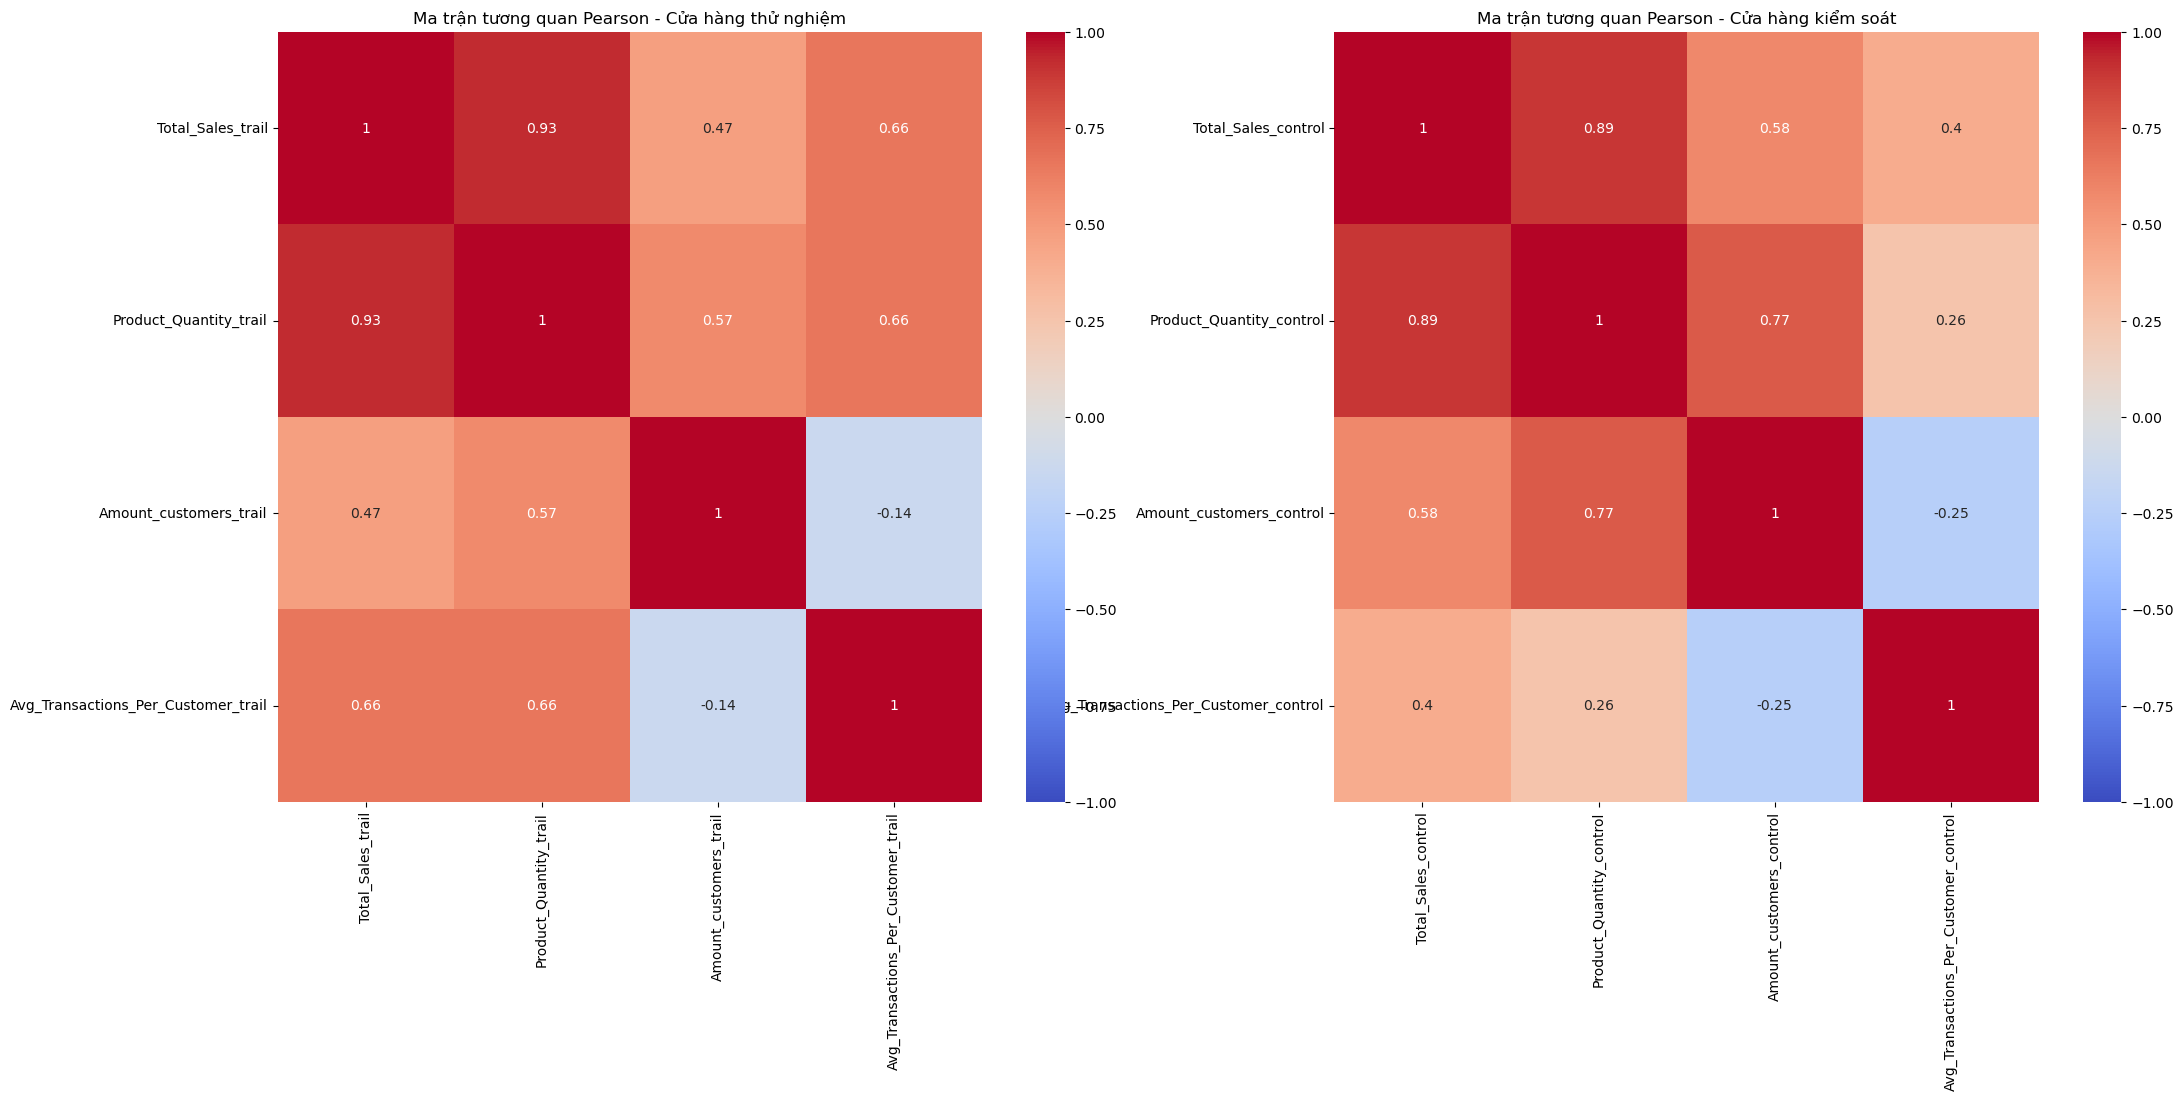

In [475]:
plot_two_correlation_heatmaps(pair_230_88)

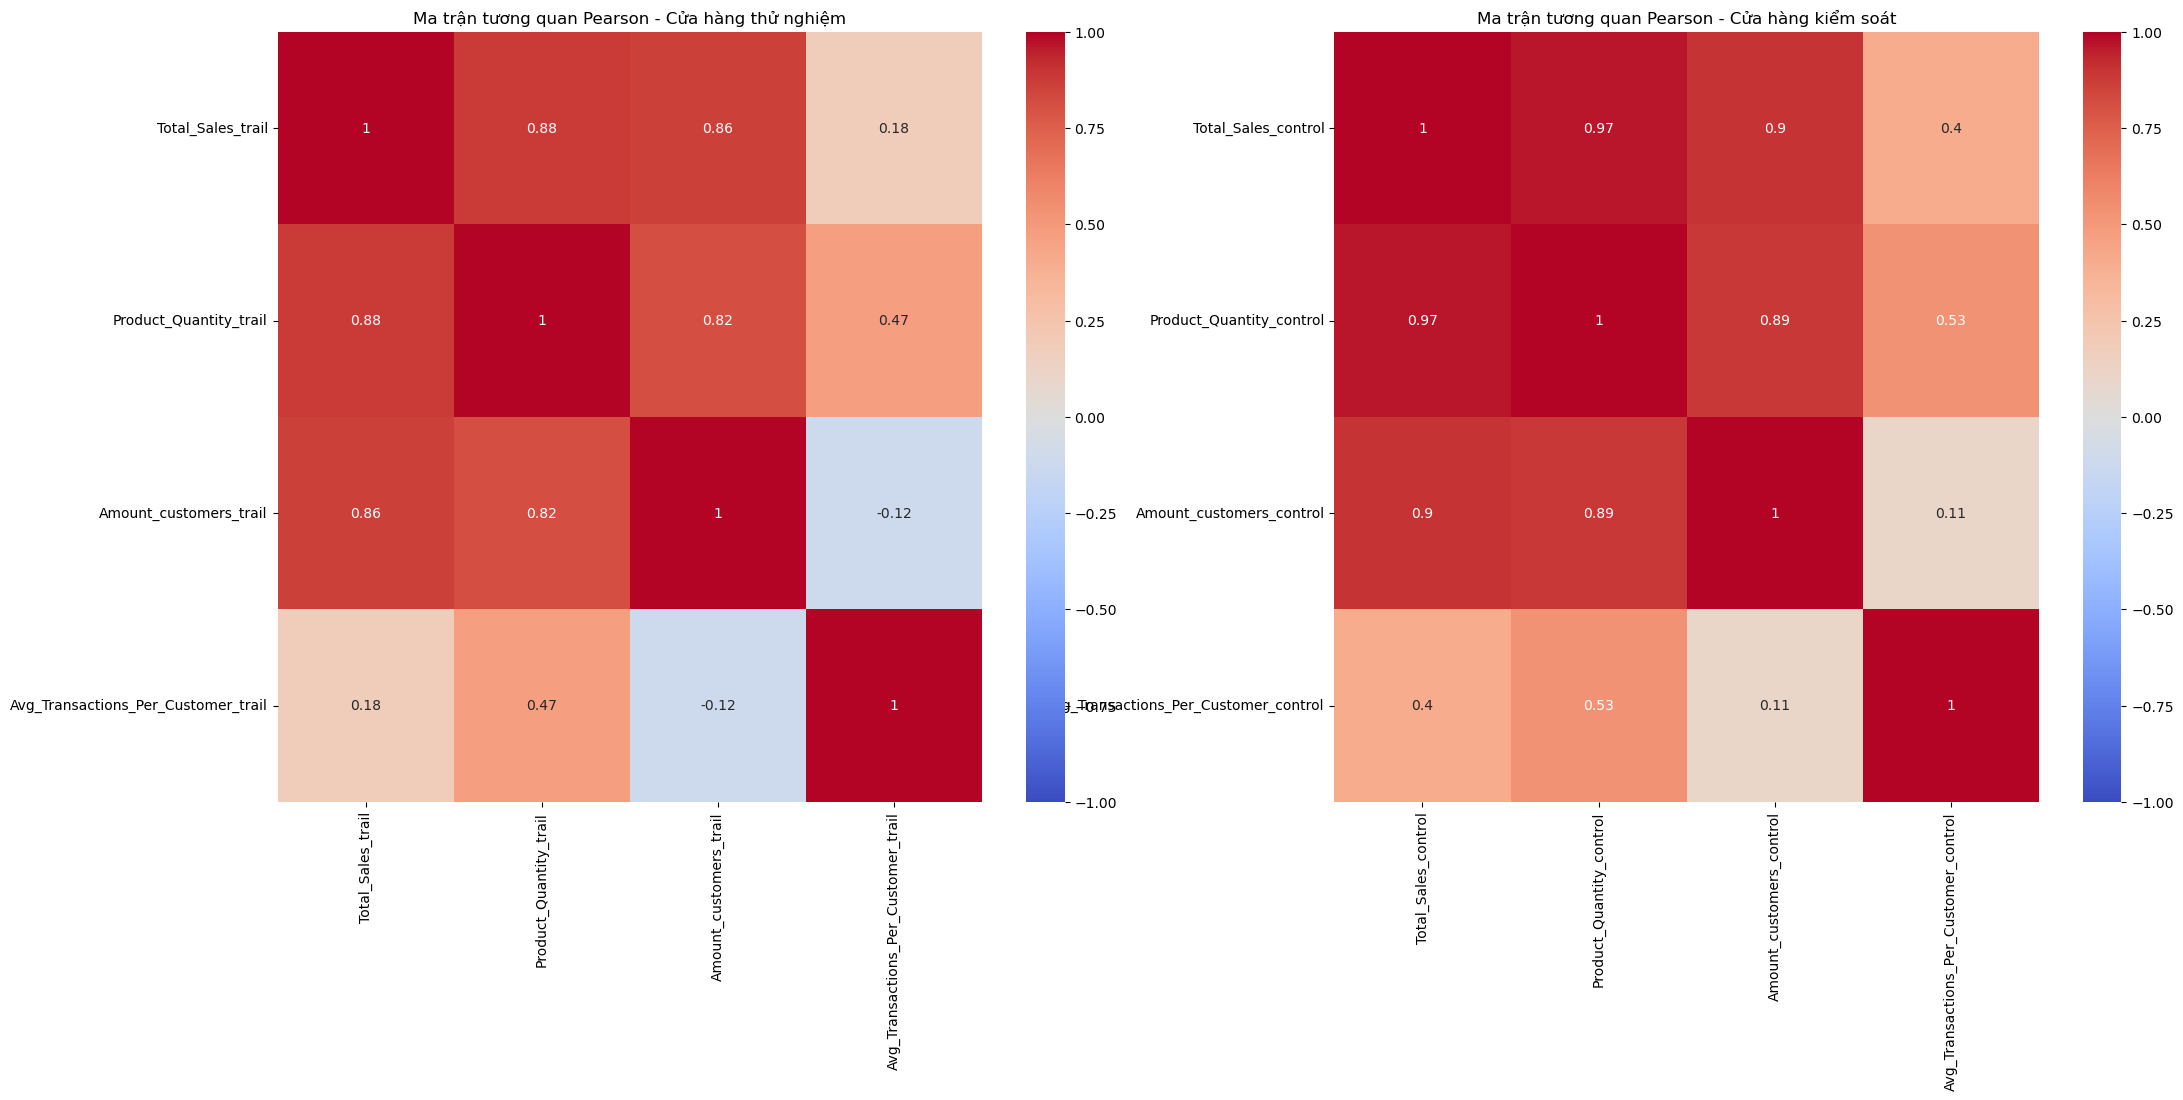

In [476]:
plot_two_correlation_heatmaps(pair_56_86)

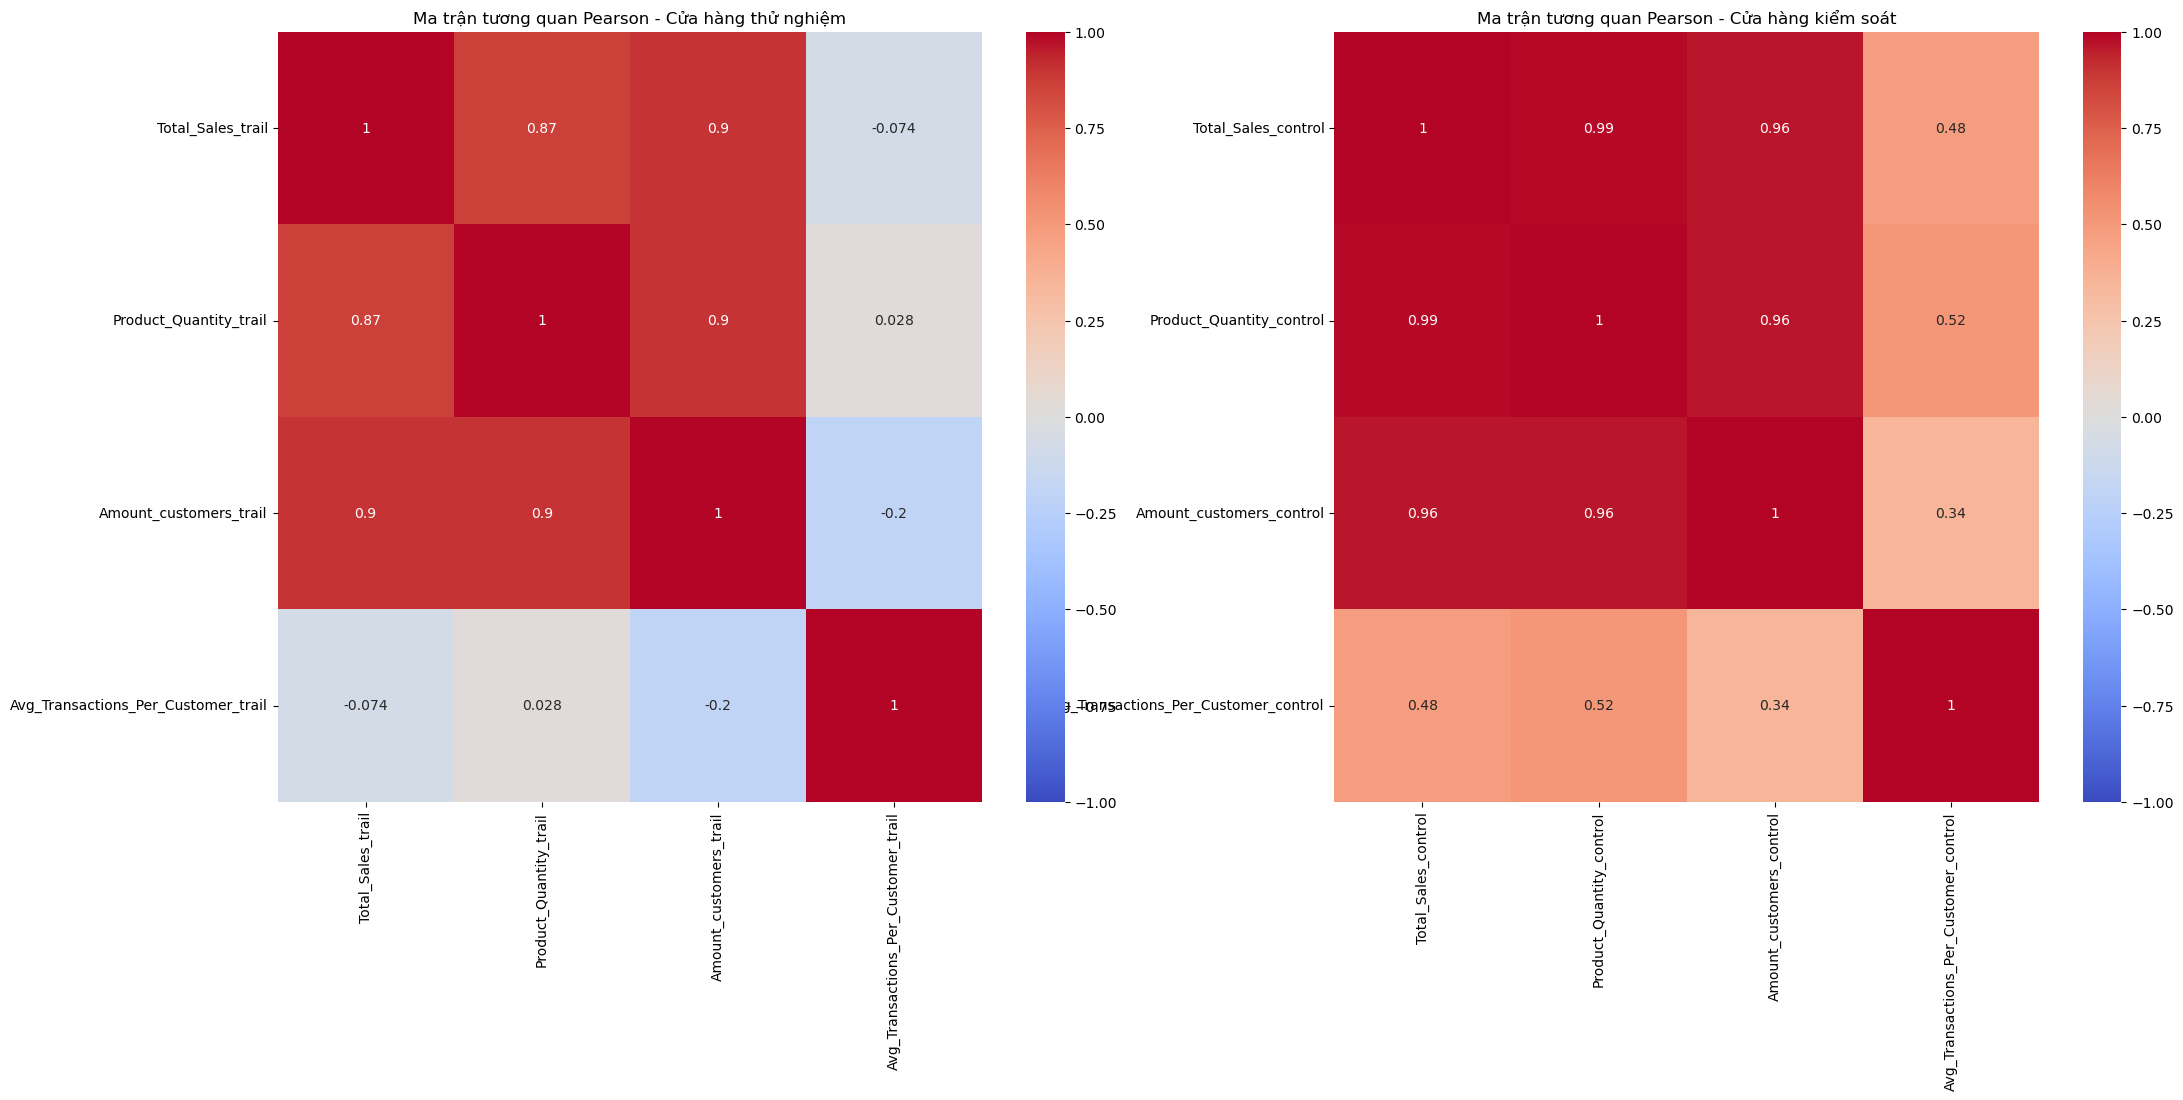

In [477]:
plot_two_correlation_heatmaps(pair_120_77)